In [35]:
%load_ext autoreload
%autoreload
%matplotlib inline
from pathlib import Path
#from train import *
from learner import *
from unet_dataset import *
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
model_id = 'unet_v1_test'
train_id = 1
log_id = model_id + str(train_id)

In [37]:
train_dataset=UNetDataset(root_dir=Path('simple_dataset'), part='train')
valid_dataset=UNetDataset(root_dir=Path('simple_dataset'), part='valid')

In [38]:
model = UNet(size=train_dataset.item_size, in_channels=train_dataset.image_channels, classes=train_dataset.classes, depth=5)

In [39]:
writer = SummaryWriter('runs/' + log_id)

In [40]:
def handle_end_epoch(epoch_loss, epoch):
    writer.add_scalar('loss', epoch_loss, epoch)

In [41]:
callback = LearnerCallback(end_epoch=handle_end_epoch)

learner = UNetLearner(model, train_dataset=train_dataset, valid_dataset=valid_dataset, cuda=True, callback=callback)

In [42]:
learner.train(n_epochs=100, batch_size=2)

Epoch 0 train loss: 0.337298975388209 valid loss: 0.3367634892463684
Epoch 1 train loss: 0.33516056338946026 valid loss: 0.33429542779922483
Epoch 2 train loss: 0.3324880699316661 valid loss: 0.3317068576812744
Epoch 3 train loss: 0.32978230714797974 valid loss: 0.3291669487953186
Epoch 4 train loss: 0.32714502612749735 valid loss: 0.32671858072280885
Epoch 5 train loss: 0.32461057305336 valid loss: 0.3243732571601868
Epoch 6 train loss: 0.322173136472702 valid loss: 0.3221194207668304
Epoch 7 train loss: 0.3198257644971212 valid loss: 0.31995015144348143
Epoch 8 train loss: 0.3175644199053446 valid loss: 0.31786651611328126
Epoch 9 train loss: 0.31538617610931396 valid loss: 0.31585821509361267
Epoch 10 train loss: 0.31328145662943524 valid loss: 0.3139225959777832
Epoch 11 train loss: 0.31125195026397706 valid loss: 0.31206034421920775
Epoch 12 train loss: 0.30929921666781107 valid loss: 0.31027287244796753
Epoch 13 train loss: 0.3074178675810496 valid loss: 0.30854883790016174
Epoch

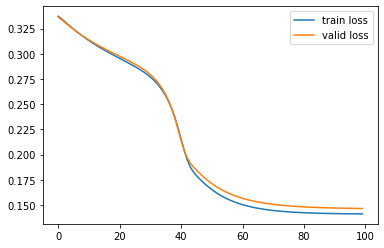

In [43]:
learner.plot_metrics()

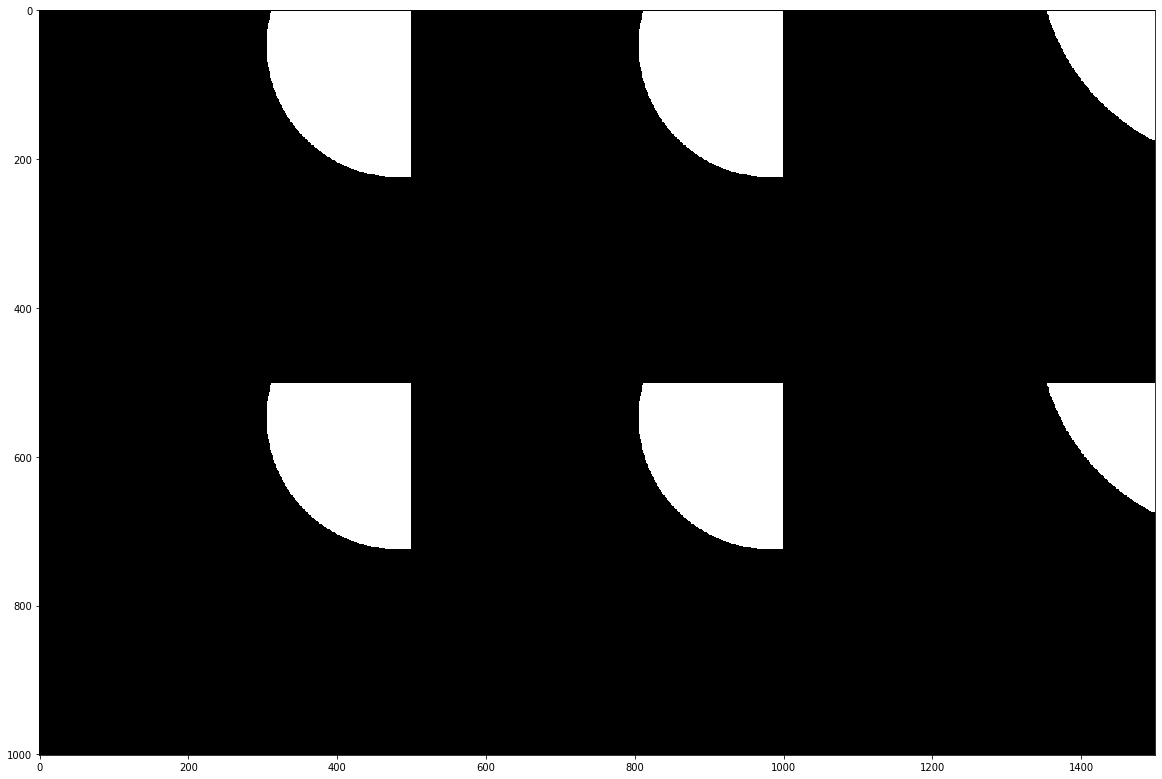

In [44]:
learner.show_results(train_dataset, 2, figsize=(20, 20))